In [1]:
from torchvision import transforms as tf
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import cv2

import glob, os

/home/taejukwon/anaconda3/envs/textdiffuser/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
vid_dir = './china'
vid_pth = os.path.join(vid_dir, 'sample.mp4')
img_pth = os.path.join(vid_dir, 'frames')

cap = cv2.VideoCapture(vid_pth)

n = 0

while True :
    ret, frame = cap.read()
    if not ret : 
        break

    image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    image = tf.CenterCrop(1500)(image).resize((512, 512))
    image.save(os.path.join(img_pth, 'frame_%04d.png' % n))
    n += 1 

In [3]:
import easyocr

os.environ['CUDA_VISIBLE_DEVICES'] = '0,'

reader = easyocr.Reader(['ko', 'en'])
sample_image = cv2.imread('/mnt/c/Users/USER/LABis/DiffUTE/figure/스윽_rotated.png')
result = reader.readtext(sample_image)

In [4]:
result

[([[97, 78], [327, 78], [327, 183], [97, 183]], '스올', 0.9961025353852008)]

In [5]:
list = []
for pts, text, p in result:
    list.append(text)

In [6]:
list

['스올']

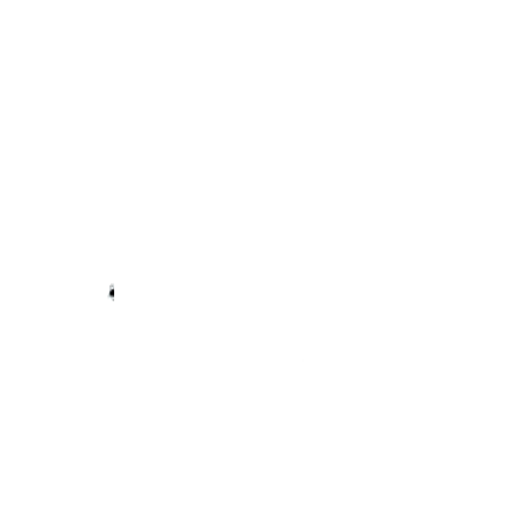

In [7]:
for pts, text, p in result :
    if text == '스올' :
        cv2.fillConvexPoly(sample_image, np.array(pts, dtype=np.int32), (255, 255, 255))

Image.fromarray(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)).resize((512, 512))

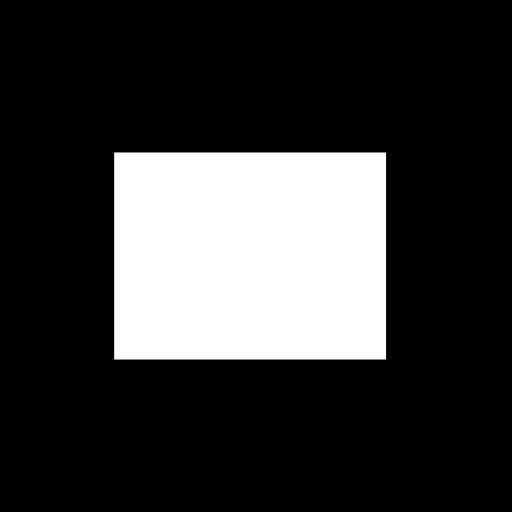

In [8]:
for pts, text, p in result :
    if text == '스올' :
        mask = np.zeros_like(sample_image)
        cv2.fillConvexPoly(mask, np.array(pts, dtype=np.int32), (255, 255, 255))

Image.fromarray(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)).resize((512, 512))